In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
from collections import Counter
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [8]:
path='https://raw.githubusercontent.com/suvoooo/Machine_Learning/master/winequality-red.csv'
df=pd.read_csv(path,sep=';')
print(df.shape)

(1599, 12)


In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

[Text(0.5, 0, 'fixed acidity'),
 Text(1.5, 0, 'volatile acidity'),
 Text(2.5, 0, 'citric acid'),
 Text(3.5, 0, 'residual sugar'),
 Text(4.5, 0, 'chlorides'),
 Text(5.5, 0, 'free sulfur dioxide'),
 Text(6.5, 0, 'total sulfur dioxide'),
 Text(7.5, 0, 'density'),
 Text(8.5, 0, 'pH'),
 Text(9.5, 0, 'sulphates'),
 Text(10.5, 0, 'alcohol'),
 Text(11.5, 0, 'quality')]

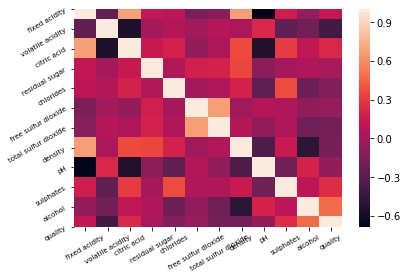

In [11]:
# the correlation plot

winecorr = df.corr()
s=sns.heatmap(winecorr)
s.set_yticklabels(s.get_yticklabels(),rotation=30,fontsize=7)
s.set_xticklabels(s.get_xticklabels(),rotation=30,fontsize=7)

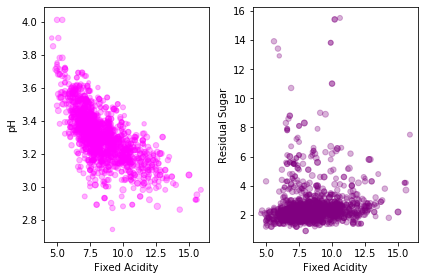

In [12]:
# individual correlation plot\
winedf=df
plt.subplot(1,2,1)
plt.scatter(winedf['fixed acidity'], winedf['pH'], s=winedf['quality']*5, color='magenta', alpha=0.3)
plt.xlabel('Fixed Acidity')
plt.ylabel('pH')
plt.subplot(1,2,2)
plt.scatter(winedf['fixed acidity'], winedf['residual sugar'], s=winedf['quality']*5, color='purple', alpha=0.3)
plt.xlabel('Fixed Acidity')
plt.ylabel('Residual Sugar')
plt.tight_layout()
plt.show()

In [14]:
X=df.drop(['quality'],axis=1)
Y=df['quality']

In [15]:
Counter(Y)

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})

In [16]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

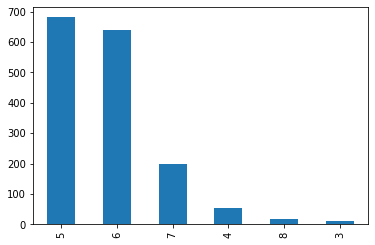

In [17]:
df['quality'].value_counts().plot(kind='bar')

In [18]:
steps = [('scaler', StandardScaler()), ('SVM', SVC())]
pipeline = Pipeline(steps) # define the pipeline object.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=30, stratify=Y)

In [20]:
parameteres = {'SVM__C':[0.001,0.1,10,100,10e5], 'SVM__gamma':[0.1,0.01]}

In [21]:
grid = GridSearchCV(pipeline, param_grid=parameteres, cv=5)

In [22]:
grid.fit(X_train, y_train)

print("score = %3.2f" %(grid.score(X_test,y_test)))

#pparam=pprint.PrettyPrinter(indent=2)

print (grid.best_params_)

score = 0.67
{'SVM__C': 10, 'SVM__gamma': 0.1}


In [23]:
a=2
a

2

In [26]:
#help(grid)

**GridSearchCV on iris data**

In [43]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
X,Y=iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=30, stratify=Y)
parameters = {'kernel':('linear', 'rbf'), 'C':[.1,1, 10,100]}
svc = svm.SVC(gamma="scale")
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [45]:
print (grid.best_params_)

{'SVM__C': 10, 'SVM__gamma': 0.1}
